# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [30]:
#Your code here
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras.layers import Rescaling
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [31]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    directory = 'drive/MyDrive/data',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256, 256),
    shuffle = True
)

Found 1668 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [32]:
data_iterator=data.as_numpy_iterator()

In [33]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

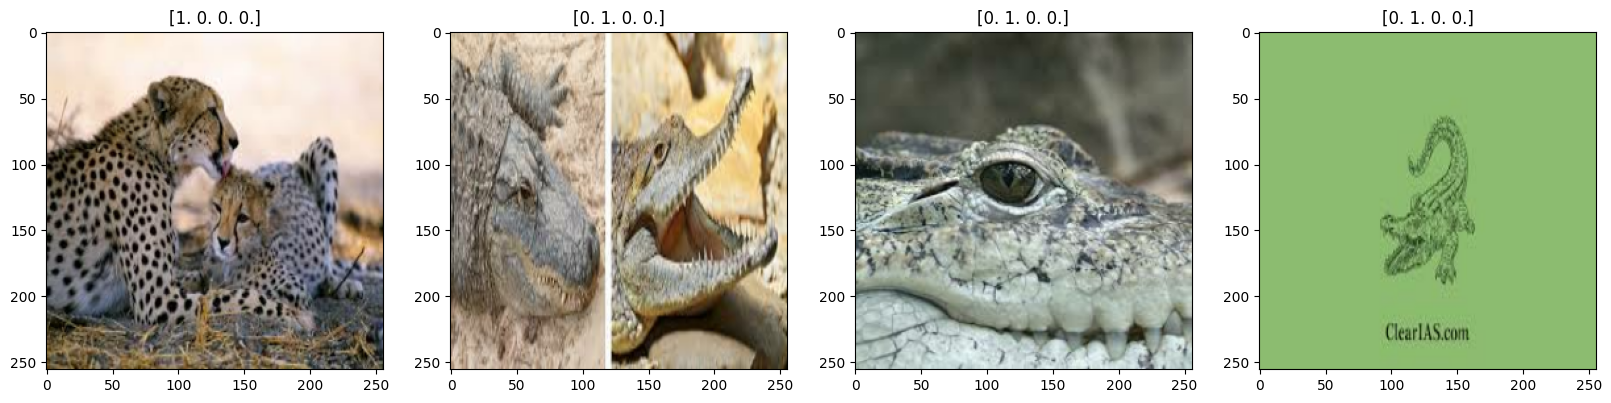

In [34]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(str(batch[1][idx]))

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [35]:
def rescale(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  return x, y

data=data.map(lambda x, y: rescale((x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [36]:
#Your code here
data_size = len(data)
train_size = int(0.75*data_size)
val_size = int(0.15*data_size)
test_size = int(0.1*data_size)

train = data.take(train_size)
rem = data.skip(train_size)
val = rem.take(val_size)
test = rem.take(test_size)


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [37]:
model=Sequential()

model.add(Conv2D(32, (3, 3), strides=1, input_shape=(256, 256, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding ='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), strides=1, input_shape=(256, 256, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), padding ='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(2048))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='softmax'))

**Q.6** Compile your model

In [48]:
model.compile(
    optimizer = tf.keras.optimizers.RMSprop(0.0001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [49]:
model.fit(train, epochs = 25, validation_data=val)

Epoch 1/25
39/39 [==============================] - 34s 594ms/step - loss: 3.0754 - accuracy: 0.4848 - val_loss: 8.0256 - val_accuracy: 0.2857
Epoch 2/25
39/39 [==============================] - 25s 617ms/step - loss: 1.7792 - accuracy: 0.5377 - val_loss: 5.7771 - val_accuracy: 0.2723
Epoch 3/25
39/39 [==============================] - 25s 618ms/step - loss: 1.3563 - accuracy: 0.6066 - val_loss: 4.9712 - val_accuracy: 0.2946
Epoch 4/25
39/39 [==============================] - 26s 621ms/step - loss: 1.1246 - accuracy: 0.6506 - val_loss: 6.7077 - val_accuracy: 0.2812
Epoch 5/25
39/39 [==============================] - 25s 608ms/step - loss: 0.9806 - accuracy: 0.7035 - val_loss: 9.5315 - val_accuracy: 0.3036
Epoch 6/25
39/39 [==============================] - 25s 585ms/step - loss: 0.9580 - accuracy: 0.7292 - val_loss: 6.8322 - val_accuracy: 0.3884
Epoch 7/25
39/39 [==============================] - 26s 609ms/step - loss: 0.6955 - accuracy: 0.7588 - val_loss: 8.8011 - val_accuracy: 0.3571

**Q.8** Test your code with test set

In [50]:
loss,accuracy=model.evaluate(test)

5/5 [==============================] - 13s 231ms/step - loss: 1.3342 - accuracy: 0.8562


In [51]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.856249988079071


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**